# Plotting


The most popular tool to create scientific figures is probably [matplotlib](https://matplotlib.org/). It has a great flexibility and allows you to create pretty much any figure you like.

Data exploration benefits from interactive plotting. Here [bokeh](https://docs.bokeh.org/en/latest/index.html) and [plotly](https://plot.ly/python/) provide attractive alternatives.

In [1]:
import numpy as np # widely used python library for data manipulation, the 'as' allows you to rename the package on import
import pandas as pd
import json, yaml
import sys # get some information about the current OS

import matplotlib.pyplot as plt

# show figures inline in the notebook
%matplotlib inline 


from pathlib import Path  # working with path objects - usefull for OS independent code

from edaipynb.tools.notebook import restart_kernel
path_data = Path('./data_tmp')


# the following command reloads external packages that have been changed externally without the need to restart the kernel
%load_ext autoreload
%autoreload 2

## Define some functions

In [2]:
# def my_function()
my_function = lambda x, a, b : np.sin(a*x)*np.exp(-b*x)

## Matplotlib

There exists great material to procude all kinds of figures.

https://matplotlib.org/tutorials/index.html


In addition one can make animations 

MovieWriter imagemagick unavailable. Trying to use pillow instead.


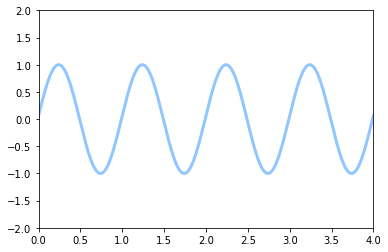

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')

## Bokeh

Example take from here:
https://github.com/bokeh/bokeh/blob/1.4.0/examples/howto/notebook_comms/Jupyter%20Interactors.ipynb

first restart the kernal to make sure everything works

In [5]:
# restart_kernel()

In [6]:
from ipywidgets import interact
import numpy as np
from edaipynb.tools.notebook import restart_kernel
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5),
           background_fill_color='#efefef')
r = p.line(x, y, color="#8888cc", line_width=1.5, alpha=0.8)

def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()


show(p, notebook_handle=True)

interact(update, f=["sin", "cos"], w=(0,50), A=(1,10), phi=(0, 20, 0.1))


Loading BokehJS ...

interactive(children=(Dropdown(description='f', options=('sin', 'cos'), value='sin'), IntSlider(value=1, descr…

<function __main__.update(f, w=1, A=1, phi=0)>

## Plotly

In [ ]:
# restart_kernel()

In [7]:
import datetime
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from ipywidgets import widgets

In [8]:
import plotly.graph_objs as go
import numpy as np
from ipywidgets import interact

In [9]:
fig = go.FigureWidget()
fig.add_scatter(x=[0], y=[1], mode='markers')



xs=np.linspace(0, 6, 100)

@interact(a=(1.0, 4.0, 0.01), b=(0, 10.0, 0.01), color=['red', 'green', 'blue'])
def update(a=3.6, b=4.3, color='blue'):
    with fig.batch_update():
        fig.data[0].x=xs
        fig.data[0].y=np.sin(a*xs-b)
        fig.update_traces(mode='markers', marker_line_width=2, marker_size=10, marker_color=color)
fig

interactive(children=(FloatSlider(value=3.6, description='a', max=4.0, min=1.0, step=0.01), FloatSlider(value=…

FigureWidget({
    'data': [{'marker': {'color': 'blue', 'line': {'width': 2}, 'size': 10},
              'mod…

# Exercises

<p style="color: red;"> Ex1:</p>
Make an interactive plot that plots a gaussian and had sliders to adjust the center, with and height of the curve


<p style="color: red;"> Ex2:</p>
Create a figure with 3 subplots ara


# save notebook as html

In [7]:
from edaipynb import save_notebook_as_html
save_notebook_as_html('../../html')

../../html/3) Plotting.html saved
